# AirBnB Dataset
This is an effort to predict the AirBnB prices in New York city based on the kaggle data set. In this notebook, three broad classifications of activities are: analysis and visulization, processing and results. This project will consider only the values given and will not delve into NLP. The data has 50,000 data points and seems to be pretty intricate. However, it seems to have missing values.

# Breakdown of this notebook:
1. **Importing Libraries**
2. **Loading the dataset**
3. **Data Cleaning** 
 - Inital checks on data (for null and duplicate values)
 - Dropping irrelevant data
   
4. **Data Visualization and Analysis:** 
    - Plot 1: Distribution of listings across neibghourhood groups
    - Plot 2: Distribution of listings across geography wrt availability
    - Plot 3: Distribution of listings across geography wrt price
    - Plot 4: Neighbourhood average price distribution
    - Plot 5: Distribution of listings across geography wrt ratings
    - Analysis 
    
    

### WIP: 
5. **Regression Analysis**
 - Linear Regression
 - Decision Tree Regression
 - Random Forest Regression

### Importing Libraries

In [38]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as plt 
import matplotlib.image as mpimg
%matplotlib inline 

### Loading the dataset

In [39]:
unprocessed_df = pd.read_csv("..\AirBnB Dataset\AB_NYC_2019.csv")
unprocessed_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Data Cleaning

In [40]:
unprocessed_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [41]:
unprocessed_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [42]:
unprocessed_df.set_index(unprocessed_df['id'],inplace=True)
unprocessed_df.drop(['id','name','host_name','last_review'],axis=1,inplace=True)

In [43]:
preprocessed_df = unprocessed_df.fillna(0)

### Data Visualization

In [44]:
plt.rcParams['figure.figsize'] = 15,5
sns.set(style="darkgrid")

Text(0.5, 1.0, 'Plot 1: Distribution of listings across neibghourhood groups')

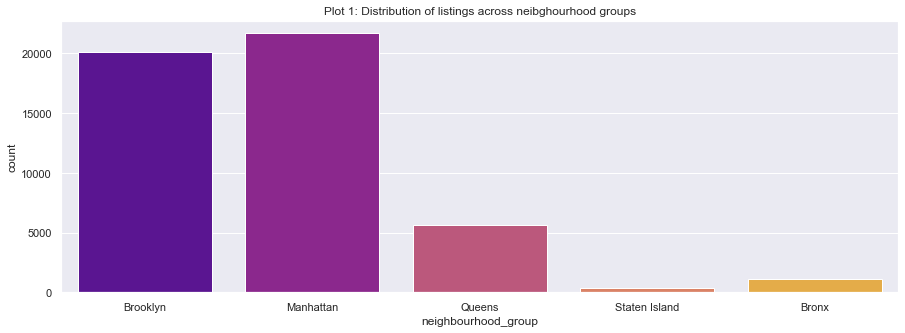

In [45]:
plt1 = sns.countplot(preprocessed_df['neighbourhood_group'],palette = "plasma")
plt1.set_title('Plot 1: Distribution of listings across neibghourhood groups')

In [46]:
plt.rcParams['figure.figsize'] = 13.26  ,12.91
sns.set(style="dark")

Text(0.5, 1.0, 'Plot 2: Distribution of listings across geography wrt availability')

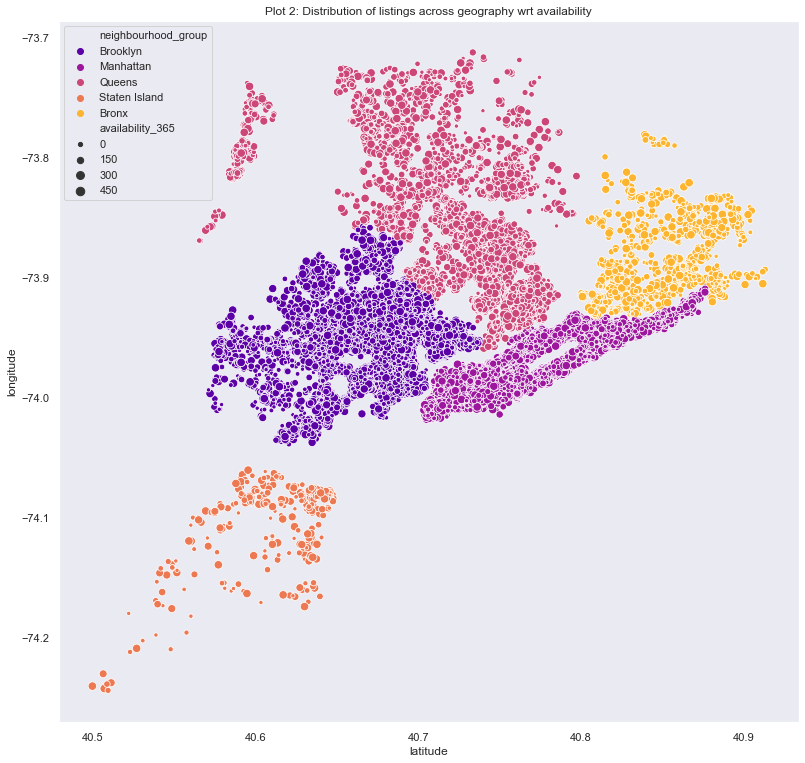

In [47]:
plt2 = sns.scatterplot(preprocessed_df['latitude'],
                       preprocessed_df['longitude'],
                       hue = preprocessed_df['neighbourhood_group'],
                       palette='plasma',
                       size = preprocessed_df['availability_365'])
plt2.set_title('Plot 2: Distribution of listings across geography wrt availability')

Text(0.5, 1.0, 'Plot 3: Distribution of listings across geography wrt price')

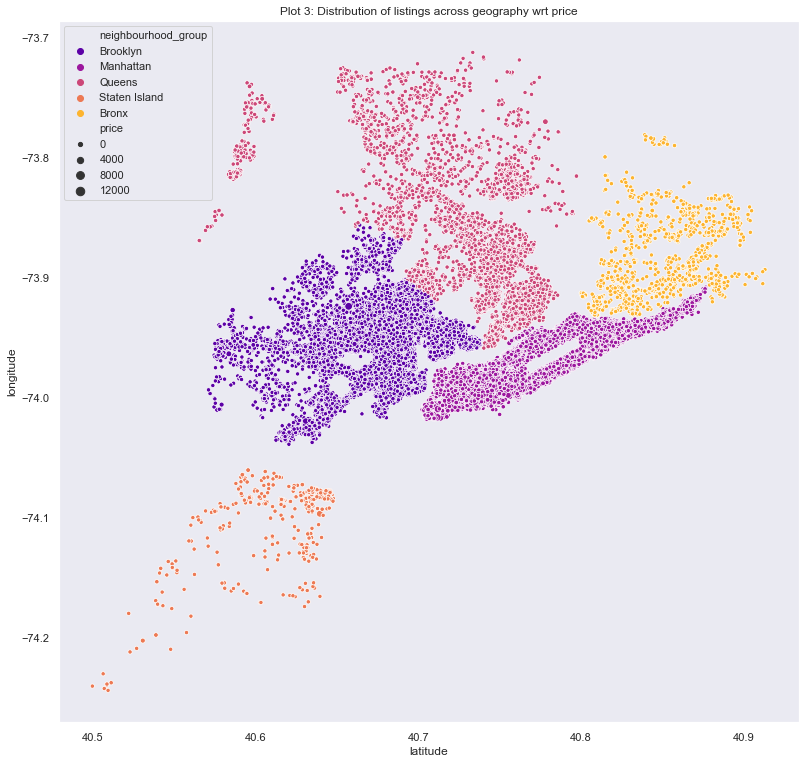

In [48]:
plt3 = sns.scatterplot(preprocessed_df['latitude'],
                       preprocessed_df['longitude'],
                       hue = preprocessed_df['neighbourhood_group'],
                       palette='plasma',
                       size = preprocessed_df['price'])
plt3.set_title('Plot 3: Distribution of listings across geography wrt price')

In [49]:
plt.rcParams['figure.figsize'] = 10,10
sns.set(style="dark")

Text(0.5, 1.0, 'Plot 4: Neighbourhood average price distribution')

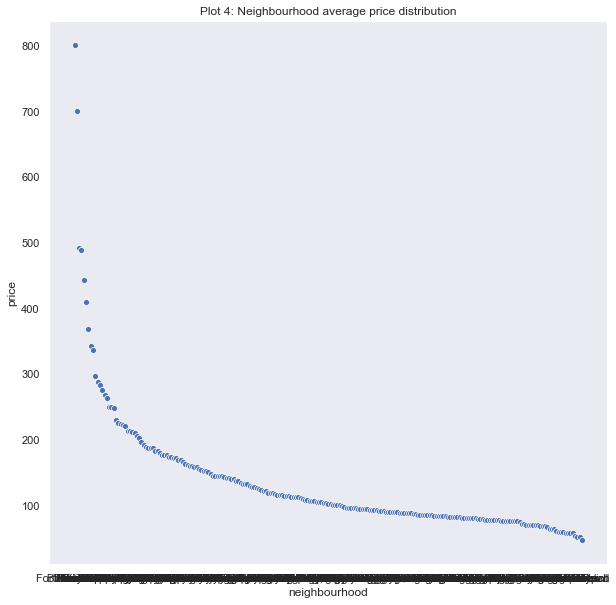

In [50]:
plt4 = sns.scatterplot(x=preprocessed_df.groupby('neighbourhood').mean().sort_values('price',ascending=False).index,
            y=preprocessed_df.groupby('neighbourhood').mean().sort_values('price',ascending=False)['price'])
plt4.set_title('Plot 4: Neighbourhood average price distribution')

Text(0.5, 1.0, 'Plot 4: Neighbourhood average price distribution(magnified head)')

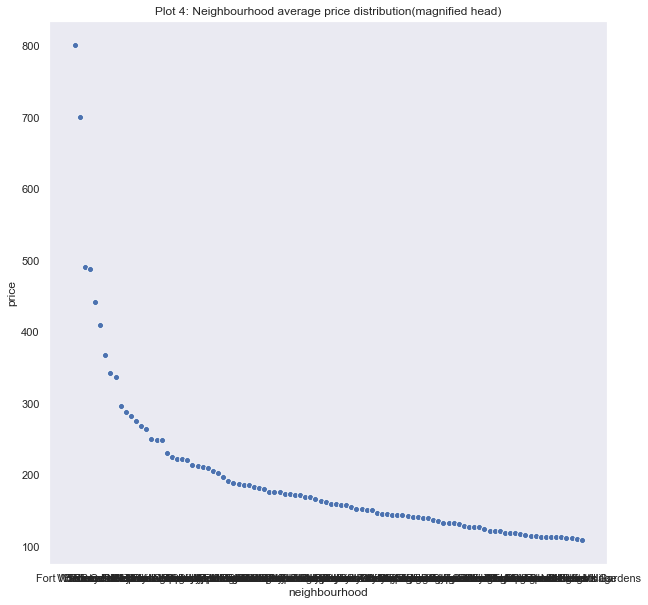

In [51]:
plt4_mag = sns.scatterplot(x=preprocessed_df.groupby('neighbourhood').mean().sort_values('price',ascending=False).index[:100],
            y=preprocessed_df.groupby('neighbourhood').mean().sort_values('price',ascending=False)['price'][:100])
plt4_mag.set_title('Plot 4: Neighbourhood average price distribution(magnified head)')

Text(0.5, 1.0, 'Plot 4: Neighbourhood average price distribution(magnified tail)')

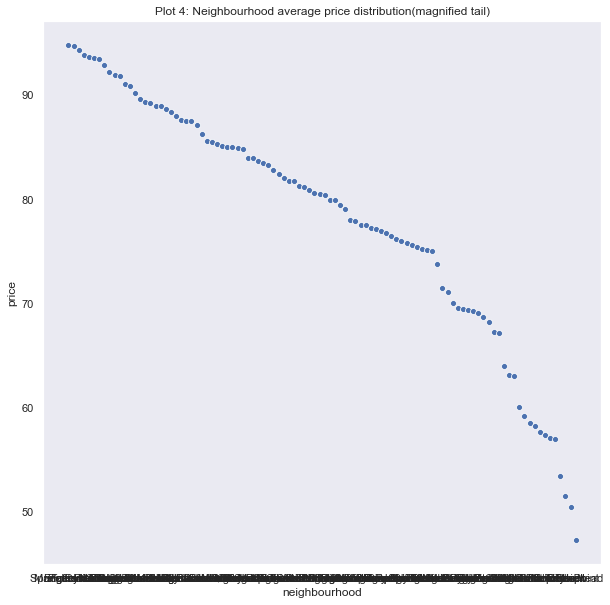

In [52]:
plt4_mag = sns.scatterplot(x=preprocessed_df.groupby('neighbourhood').mean().sort_values('price',ascending=False).index[-100:],
            y=preprocessed_df.groupby('neighbourhood').mean().sort_values('price',ascending=False)['price'][-100:])
plt4_mag.set_title('Plot 4: Neighbourhood average price distribution(magnified tail)')

Text(0.5, 1.0, 'Plot 5: Distribution of listings across geography wrt ratings')

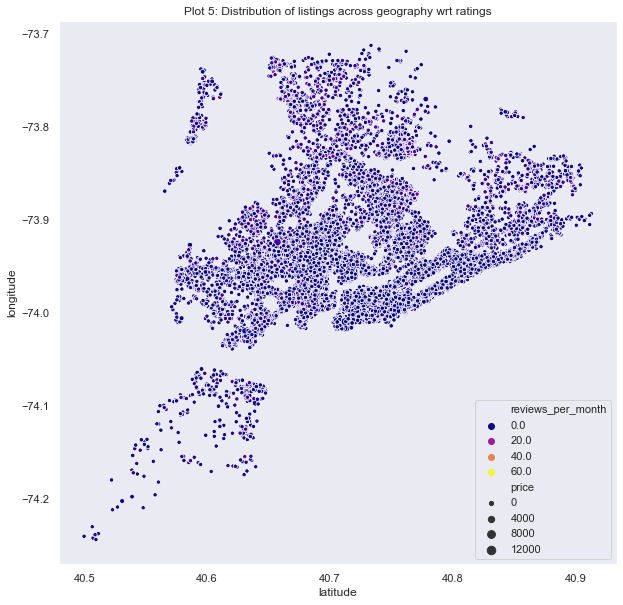

In [53]:
plt5 = sns.scatterplot(preprocessed_df['latitude'],
                       preprocessed_df['longitude'],
                       hue = preprocessed_df['reviews_per_month'],
                       palette  = 'plasma',
                       size = preprocessed_df['price'])
plt5.set_title('Plot 5: Distribution of listings across geography wrt ratings')

#### Analysis & conclusion

1. Plot 1: 
    - Manhattan, Brooklyn and Queens make up for most of the listings. 
2. Plot 2: 
    - There seems to be no incorrect recording of data geographically. 
    - Availability is not related to location to a large extent 
    - Staten Islands is scarsely populated for airbnb's
3. Plot 3: 
    - Price seems to be fairly distributed across the city
4. Plot 4:
    - Most of the neighbourhoods seem to have compareable pricing
    - The top and bottom 30 priciest seem to be dispropotionate to the remaining data. 
5. Plot 5: 
    - There seems to be no correlartion between the rating/reviews and the geography. 
    
    
I tried to fit in a linear regression, decision tree and random forest model, but for reasons that I have to find out, error was enormous. Will figure out a good model and fit to the above analysis. Will also try to perform some NLP on the text to see if there is relevant information there. 